# Response time - Sentiment change
This notebook explores how the sentiment change depends on the reply time of airlines
### Imports

In [3]:
# IMPORTS
import sys
sys.path.append("../DBL-Data-Challenge")

# Own functions
from processes.reply4 import reply_set_up
from database.connect import getConnection

# Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
df_tweets = reply_set_up()

In [5]:
df_tweets.head()

,airline,reply_time,sentiment_change,canceling,boarding,stuck,booking,customers,dm,waiting,money,information,staff,baggage
0,AirFrance,0,-0.20000,0,0,0,9,6,1,0,0,3,0,9
1,AirFrance,0,0.00000,0,0,0,0,3,0,1,2,1,0,1
2,AirFrance,0,1.10000,0,0,0,0,3,0,1,2,1,0,1
3,AirFrance,0,1.10000,0,0,0,0,4,0,1,1,1,0,1
4,AirFrance,1,-0.13333,0,0,0,1,0,3,0,0,2,0,5


In [23]:
# Creating a data frame per topic
df_canceling = df_tweets[df_tweets['canceling'] != 0][['airline', 'reply_time', 'sentiment_change']]
df_boarding = df_tweets[df_tweets['boarding'] != 0][['airline', 'reply_time', 'sentiment_change']]
df_stuck = df_tweets[df_tweets['stuck'] != 0][['airline', 'reply_time', 'sentiment_change']]
df_booking = df_tweets[df_tweets['booking'] != 0][['airline', 'reply_time', 'sentiment_change']]
df_customers = df_tweets[df_tweets['customers'] != 0][['airline', 'reply_time', 'sentiment_change']]
df_dm = df_tweets[df_tweets['dm'] != 0][['airline', 'reply_time', 'sentiment_change']]
df_waiting = df_tweets[df_tweets['waiting'] != 0][['airline', 'reply_time', 'sentiment_change']]
df_money = df_tweets[df_tweets['money'] != 0][['airline', 'reply_time', 'sentiment_change']]
df_information = df_tweets[df_tweets['information'] != 0][['airline', 'reply_time', 'sentiment_change']]
df_staff = df_tweets[df_tweets['staff'] != 0][['airline', 'reply_time', 'sentiment_change']]
df_baggage = df_tweets[df_tweets['baggage'] != 0][['airline', 'reply_time', 'sentiment_change']]


# Binned of 1 min
df_canceling_gro = df_canceling[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=200).mean()
df_boarding_gro = df_boarding[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=200).mean()
df_stuck_gro = df_stuck[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=200).mean()
df_booking_gro = df_booking[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=200).mean()
df_customers_gro = df_customers[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=200).mean()
df_dm_gro = df_dm[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=200).mean()
df_waiting_gro = df_waiting[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=200).mean()
df_money_gro = df_money[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=200).mean()
df_information_gro = df_information[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=200).mean()
df_staff_gro = df_staff[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=200).mean()
df_baggage_gro = df_baggage[['reply_time', 'sentiment_change']].groupby('reply_time').agg('mean').rolling(window=200).mean()


# Convolution filter
df_canceling_cov = df_canceling.rolling(window=1500).mean()
df_boarding_cov = df_boarding.rolling(window=2500).mean()
df_stuck_cov = df_stuck.rolling(window=1500).mean()
df_booking_cov = df_booking.rolling(window=18000).mean()
df_customers_cov = df_customers.rolling(window=17000).mean()
df_dm_cov = df_dm.rolling(window=14000).mean()
df_waiting_cov = df_waiting.rolling(window=16000).mean()
df_money_cov = df_money.rolling(window=15000).mean()
df_information_cov = df_information.rolling(window=13000).mean()
df_staff_cov = df_staff.rolling(window=8500).mean()
df_baggage_cov = df_baggage.rolling(window=9500).mean()


/var/folders/2r/1pk5npwn5l541mm_rkjxq2_00000gn/T/ipykernel_35609/661302036.py:30: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['airline'], dtype='object')
  df_canceling_cov = df_canceling.rolling(window=1500).mean()
/var/folders/2r/1pk5npwn5l541mm_rkjxq2_00000gn/T/ipykernel_35609/661302036.py:31: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['airline'], dtype='object')
  df_boarding_cov = df_boarding.rolling(window=2500).mean()
/var/folders/2r/1pk5npwn5l541mm_rkjxq2_00000gn/T/ipykernel_35609/661302036.py:32: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid column

In [19]:
# Checking the number ineach category

canceling_len = len(df_canceling.index)
boarding_len = len(df_boarding.index)
stuck_len = len(df_stuck.index)
booking_len = len(df_booking.index)
customers_len = len(df_customers.index)
dm_len = len(df_dm.index)
waiting_len = len(df_waiting.index)
money_len = len(df_money.index)
information_len = len(df_information.index)
staff_len = len(df_staff.index)
baggage_len = len(df_baggage.index)

print(f"""
      TOPIC COUNT
      canceling: {canceling_len}
      boarding: {boarding_len}
      stuck: {stuck_len}
      booking: {booking_len}
      customers: {customers_len}
      dm: {dm_len}
      waiting: {waiting_len}
      money: {money_len}
      information: {information_len}
      staff: {staff_len}
      baggage: {baggage_len}
      """)


      TOPIC COUNT
      canceling: 3378
      boarding: 5281
      stuck: 3047
      booking: 36945
      customers: 35638
      dm: 28230
      waiting: 32336
      money: 29837
      information: 27568
      staff: 17278
      baggage: 19068
      


Text(0.5, 0.98, 'Sentiment Change Over Airline Reply Time Per Topic')

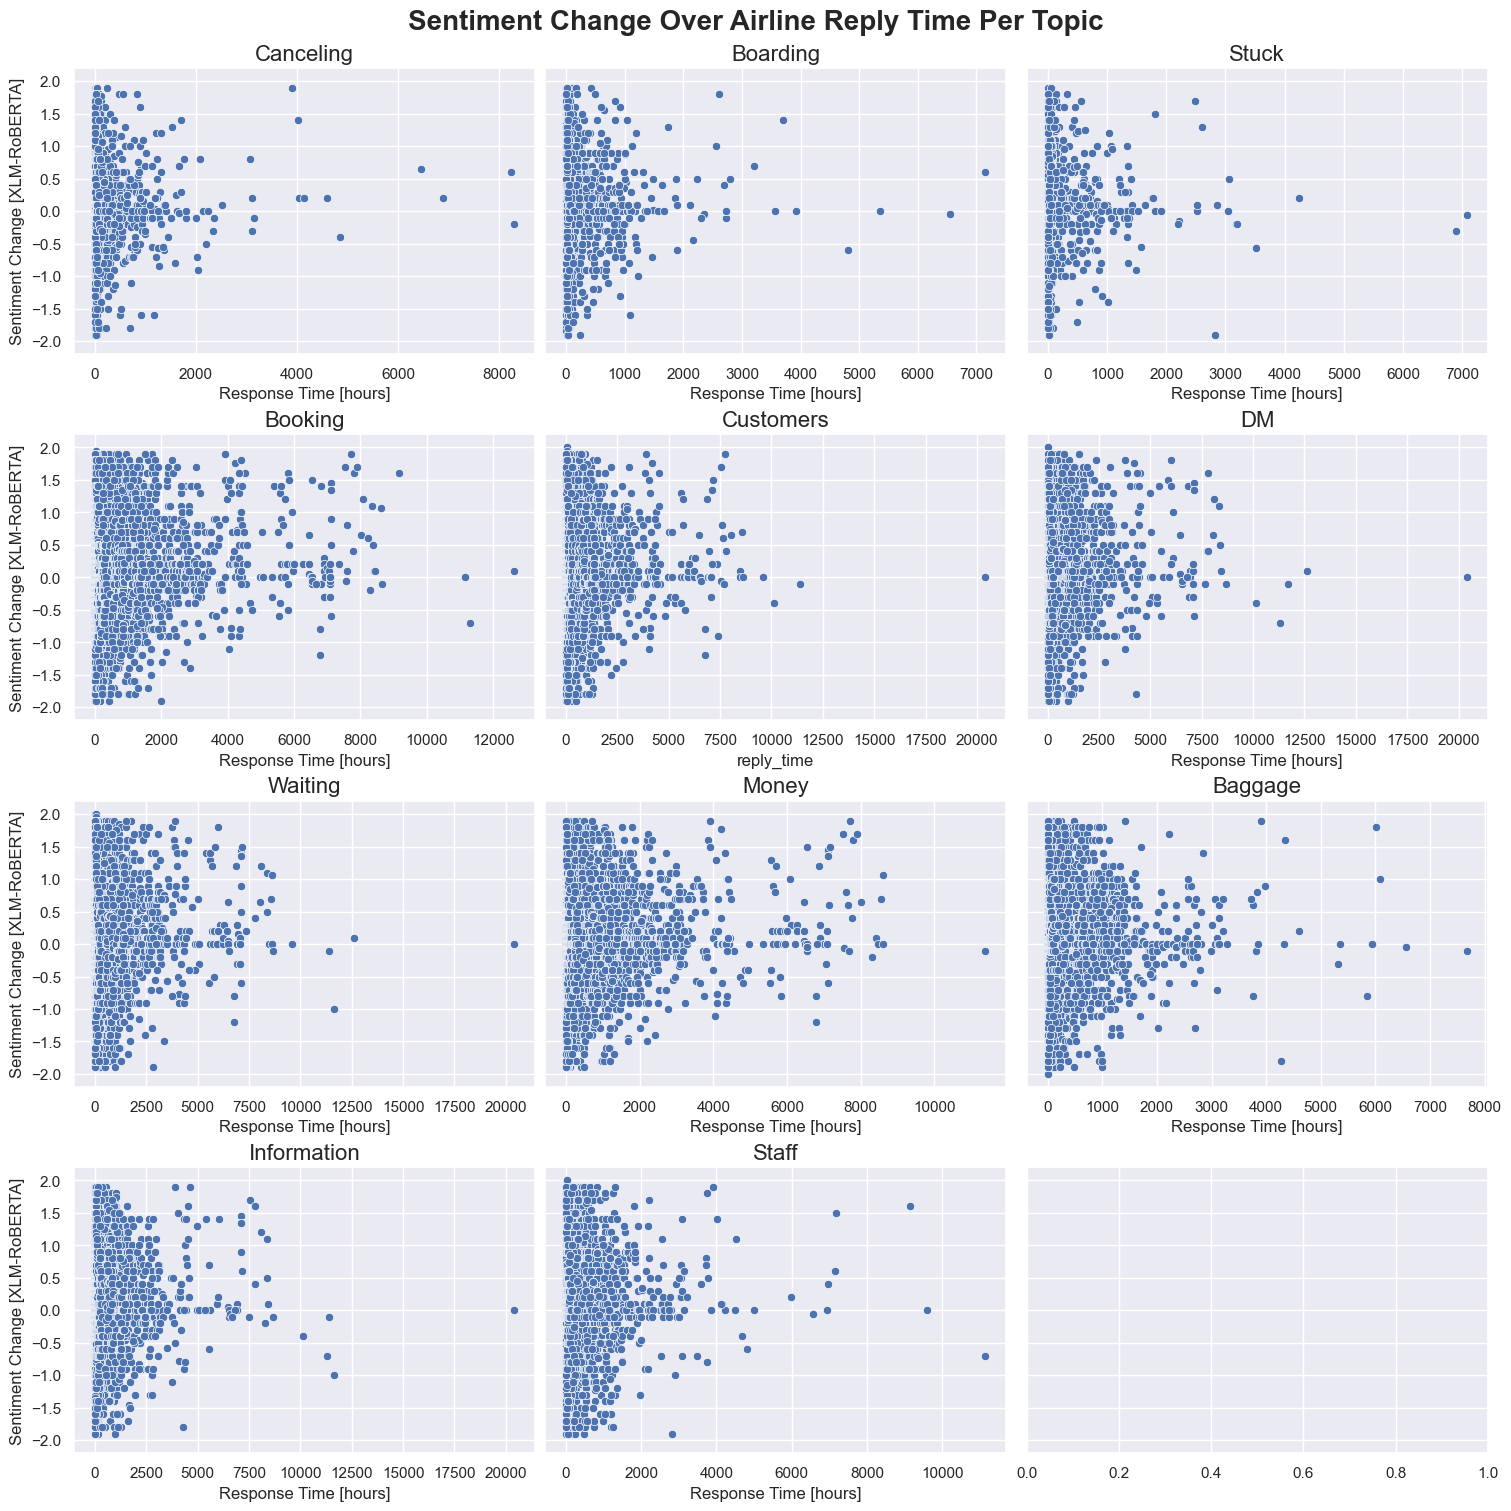

In [20]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15,15), sharey=True, layout="constrained")

# ROW 1
# Canceling
sns.scatterplot(data=df_canceling, x='reply_time', y='sentiment_change', ax=ax[0,0])
ax[0,0].set_title('Canceling', size=16)
ax[0,0].set_xlabel('Response Time [hours]')
ax[0,0].set_ylabel('Sentiment Change [XLM-RoBERTA]')


# Boarding
sns.scatterplot(data=df_boarding, x='reply_time', y='sentiment_change', ax=ax[0,1])
ax[0,1].set_title('Boarding', size=16)
ax[0,1].set_xlabel('Response Time [hours]')

# Stuck
sns.scatterplot(data=df_stuck, x='reply_time', y='sentiment_change', ax=ax[0,2])
ax[0,2].set_title('Stuck', size=16)
ax[0,2].set_xlabel('Response Time [hours]')

# ROW 2
# Booking
sns.scatterplot(data=df_booking, x='reply_time', y='sentiment_change', ax=ax[1,0])
ax[1,0].set_title('Booking', size=16)
ax[1,0].set_xlabel('Response Time [hours]')
ax[1,0].set_ylabel('Sentiment Change [XLM-RoBERTA]')


# Customers
sns.scatterplot(data=df_customers, x='reply_time', y='sentiment_change', ax=ax[1,1])
ax[1,1].set_title('Customers', size=16)
ax[1,2].set_xlabel('Response Time [hours]')

# DM
sns.scatterplot(data=df_dm, x='reply_time', y='sentiment_change', ax=ax[1,2])
ax[1,2].set_title('DM', size=16)
ax[1,2].set_xlabel('Response Time [hours]')

# ROW 3
# Waiting
sns.scatterplot(data=df_waiting, x='reply_time', y='sentiment_change', ax=ax[2,0])
ax[2,0].set_title('Waiting', size=16)
ax[2,0].set_xlabel('Response Time [hours]')
ax[2,0].set_ylabel('Sentiment Change [XLM-RoBERTA]')

# Money
sns.scatterplot(data=df_money, x='reply_time', y='sentiment_change', ax=ax[2,1])
ax[2,1].set_title('Money', size=16)
ax[2,1].set_xlabel('Response Time [hours]')

# Baggage
sns.scatterplot(data=df_baggage, x='reply_time', y='sentiment_change', ax=ax[2,2])
ax[2,2].set_title('Baggage', size=16)
ax[2,2].set_xlabel('Response Time [hours]')

# ROW 4
# Information
sns.scatterplot(data=df_information, x='reply_time', y='sentiment_change', ax=ax[3,0])
ax[3,0].set_title('Information', size=16)
ax[3,0].set_xlabel('Response Time [hours]')
ax[3,0].set_ylabel('Sentiment Change [XLM-RoBERTA]')


# Staff
sns.scatterplot(data=df_staff, x='reply_time', y='sentiment_change', ax=ax[3,1])
ax[3,1].set_title('Staff', size=16)
ax[3,1].set_xlabel('Response Time [hours]')


fig.suptitle('Sentiment Change Over Airline Reply Time Per Topic', weight='bold', size=20)

Text(0.5, 0.98, 'Sentiment Change Over Airline Reply Time Per Topic')

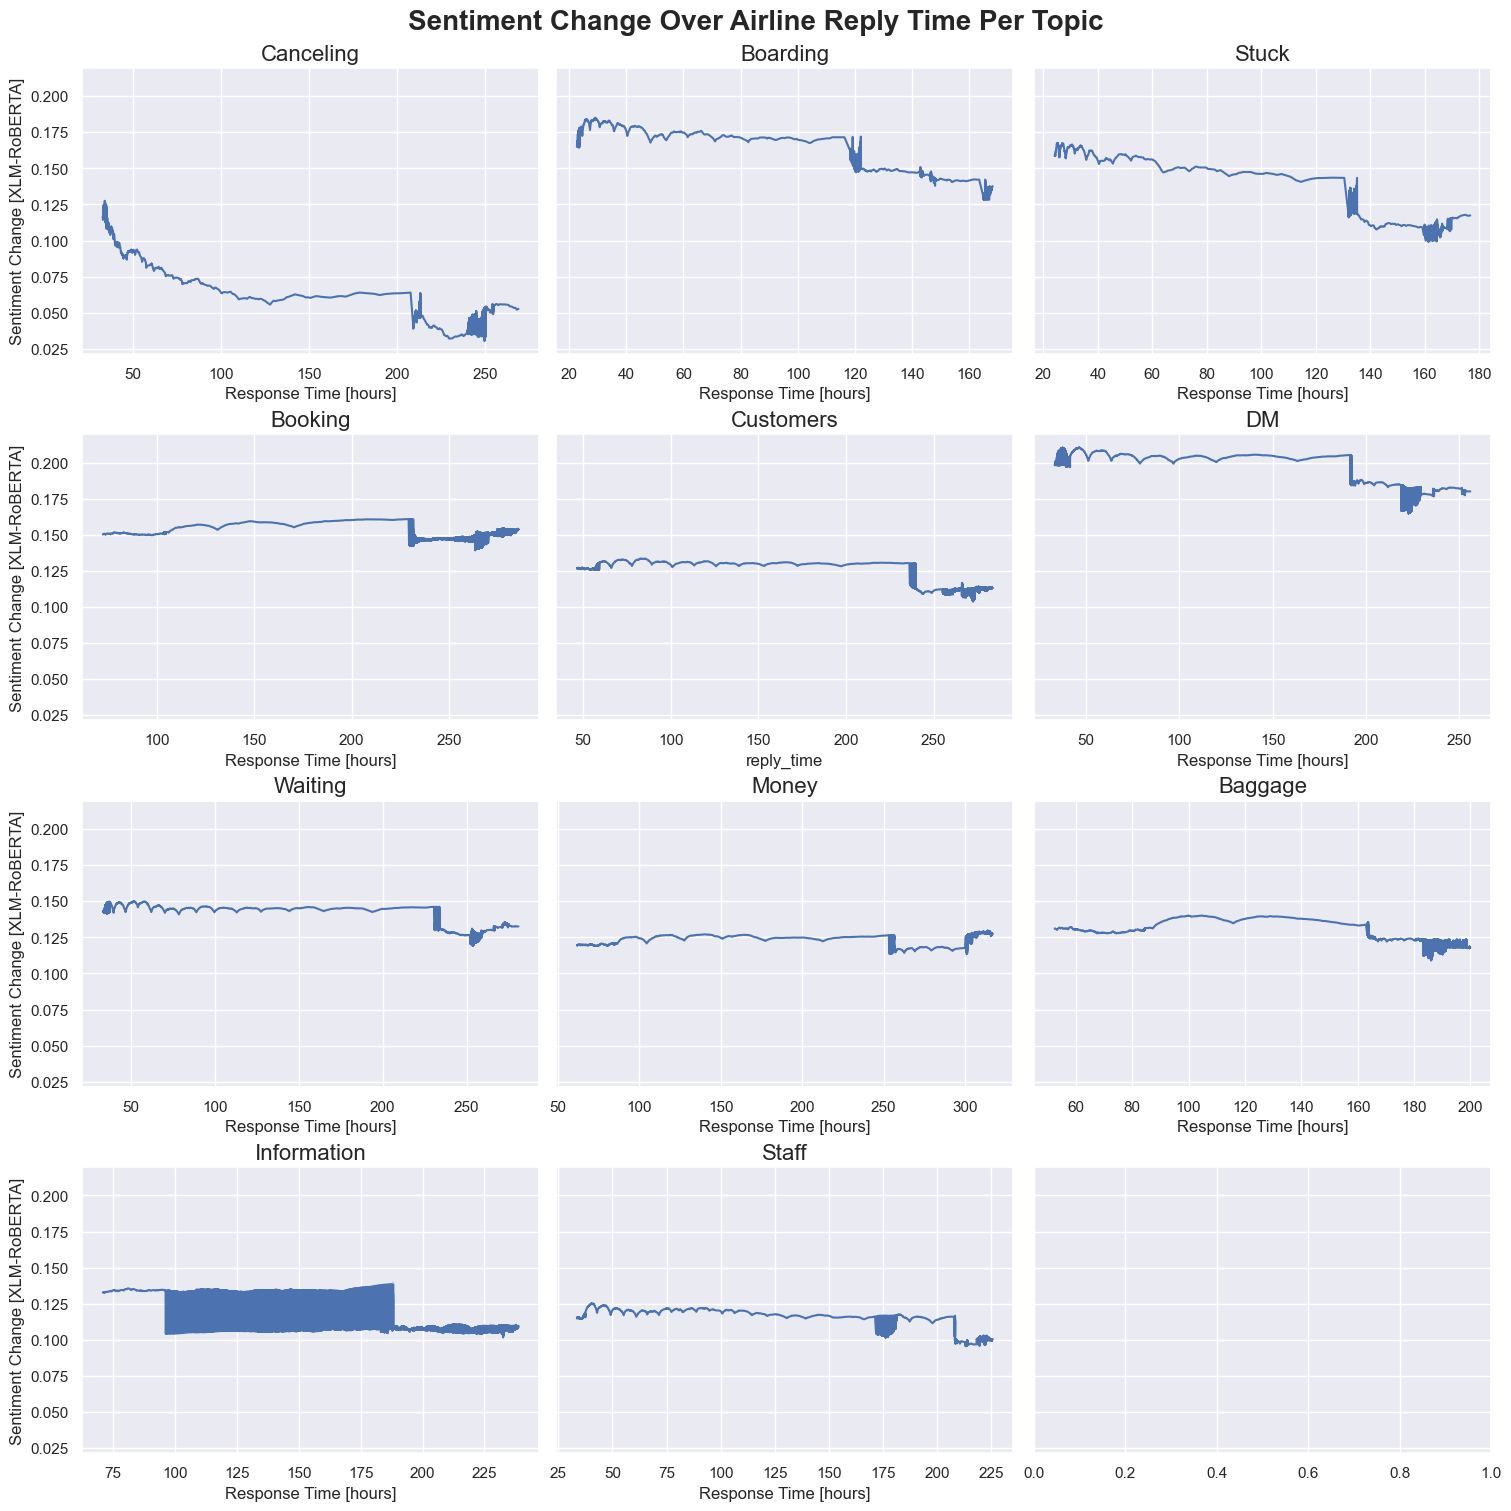

In [21]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15,15), sharey=True, layout="constrained")

# ROW 1
# Canceling
sns.lineplot(data=df_canceling_cov, x='reply_time', y='sentiment_change', ax=ax[0,0])
ax[0,0].set_title('Canceling', size=16)
ax[0,0].set_xlabel('Response Time [hours]')
ax[0,0].set_ylabel('Sentiment Change [XLM-RoBERTA]')


# Boarding
sns.lineplot(data=df_boarding_cov, x='reply_time', y='sentiment_change', ax=ax[0,1])
ax[0,1].set_title('Boarding', size=16)
ax[0,1].set_xlabel('Response Time [hours]')

# Stuck
sns.lineplot(data=df_stuck_cov, x='reply_time', y='sentiment_change', ax=ax[0,2])
ax[0,2].set_title('Stuck', size=16)
ax[0,2].set_xlabel('Response Time [hours]')

# ROW 2
# Booking
sns.lineplot(data=df_booking_cov, x='reply_time', y='sentiment_change', ax=ax[1,0])
ax[1,0].set_title('Booking', size=16)
ax[1,0].set_xlabel('Response Time [hours]')
ax[1,0].set_ylabel('Sentiment Change [XLM-RoBERTA]')


# Customers
sns.lineplot(data=df_customers_cov, x='reply_time', y='sentiment_change', ax=ax[1,1])
ax[1,1].set_title('Customers', size=16)
ax[1,2].set_xlabel('Response Time [hours]')

# DM
sns.lineplot(data=df_dm_cov, x='reply_time', y='sentiment_change', ax=ax[1,2])
ax[1,2].set_title('DM', size=16)
ax[1,2].set_xlabel('Response Time [hours]')

# ROW 3
# Waiting
sns.lineplot(data=df_waiting_cov, x='reply_time', y='sentiment_change', ax=ax[2,0])
ax[2,0].set_title('Waiting', size=16)
ax[2,0].set_xlabel('Response Time [hours]')
ax[2,0].set_ylabel('Sentiment Change [XLM-RoBERTA]')

# Money
sns.lineplot(data=df_money_cov, x='reply_time', y='sentiment_change', ax=ax[2,1])
ax[2,1].set_title('Money', size=16)
ax[2,1].set_xlabel('Response Time [hours]')

# Baggage
sns.lineplot(data=df_baggage_cov, x='reply_time', y='sentiment_change', ax=ax[2,2])
ax[2,2].set_title('Baggage', size=16)
ax[2,2].set_xlabel('Response Time [hours]')

# ROW 4
# Information
sns.lineplot(data=df_information_cov, x='reply_time', y='sentiment_change', ax=ax[3,0])
ax[3,0].set_title('Information', size=16)
ax[3,0].set_xlabel('Response Time [hours]')
ax[3,0].set_ylabel('Sentiment Change [XLM-RoBERTA]')


# Staff
sns.lineplot(data=df_staff_cov, x='reply_time', y='sentiment_change', ax=ax[3,1])
ax[3,1].set_title('Staff', size=16)
ax[3,1].set_xlabel('Response Time [hours]')


fig.suptitle('Sentiment Change Over Airline Reply Time Per Topic', weight='bold', size=20)


Text(0.5, 0.98, 'Sentiment Change Over Airline Reply Time Per Topic')

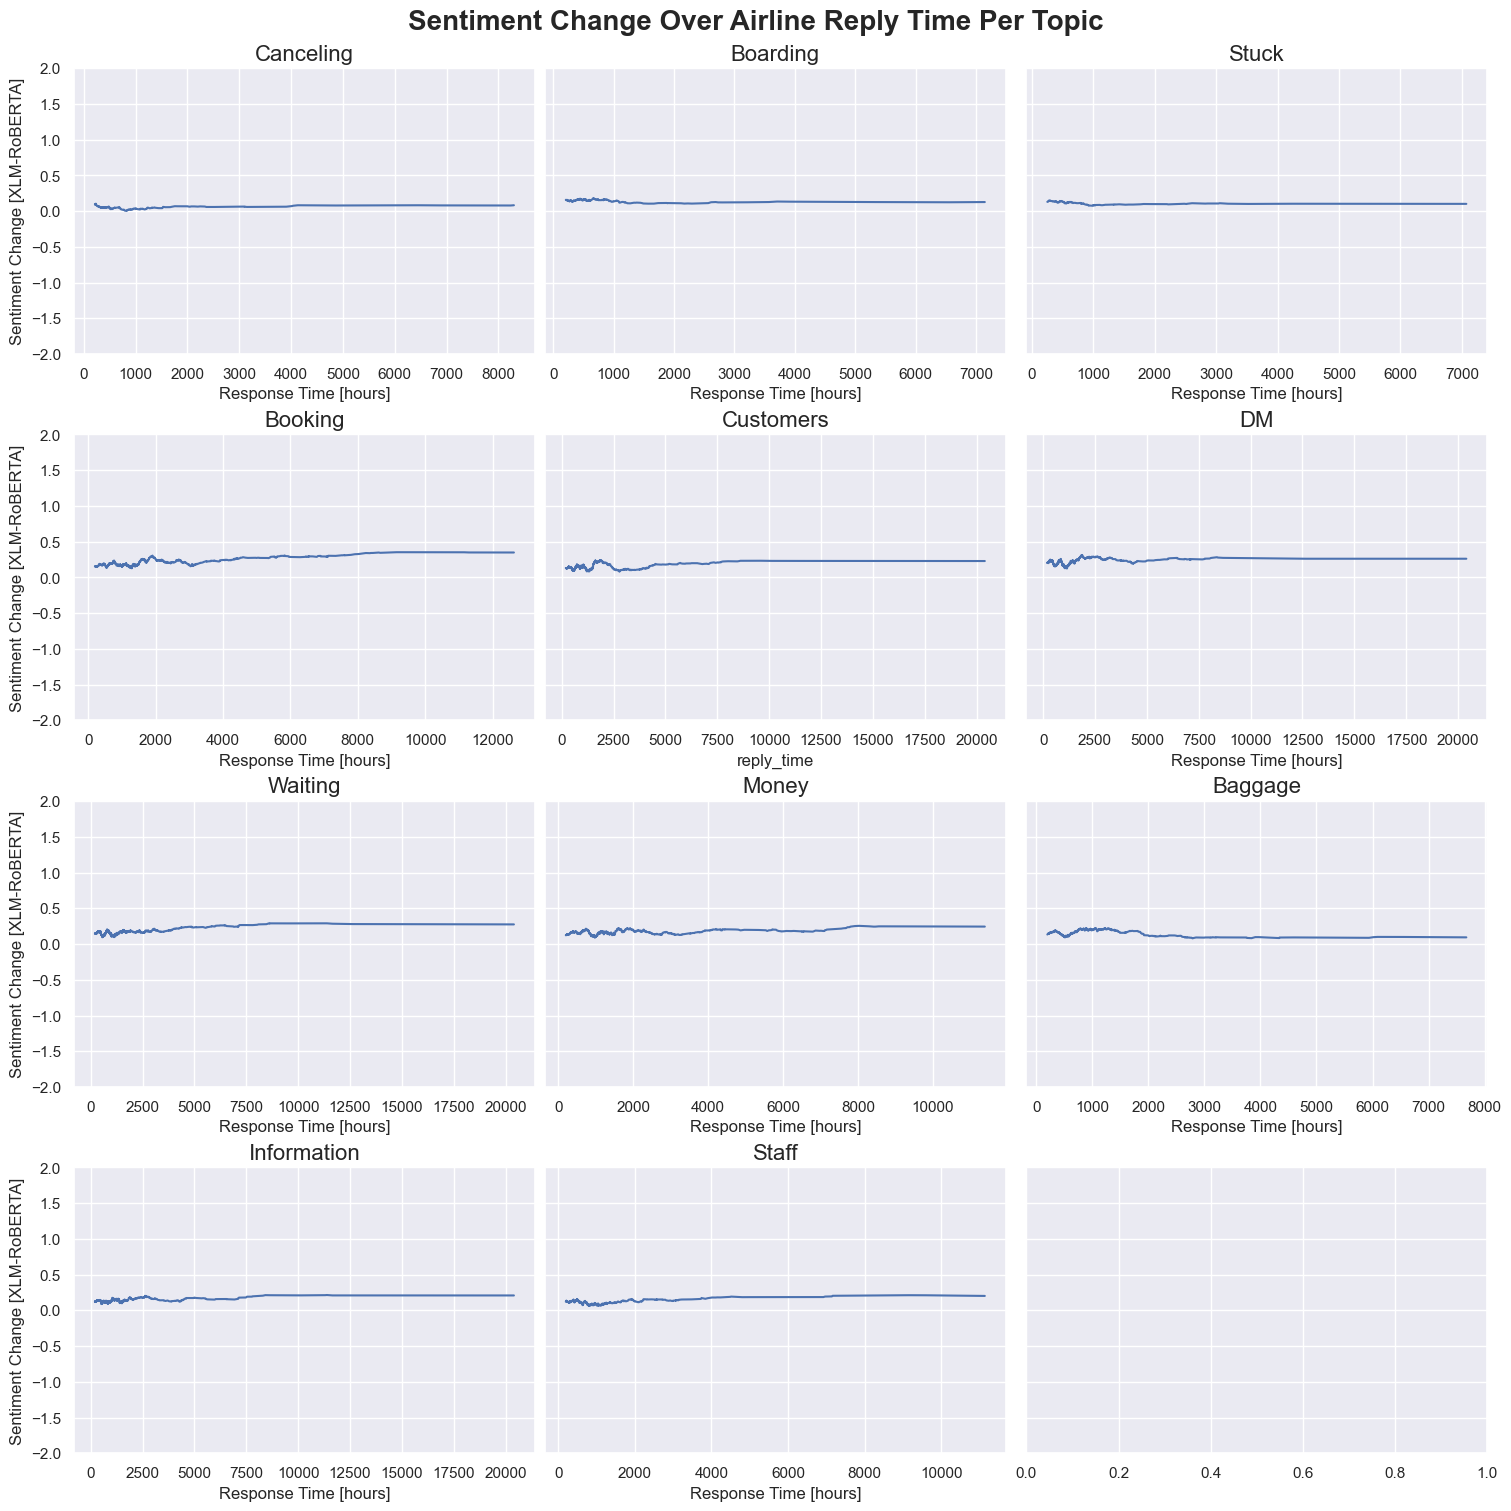

In [29]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15,15), sharey=True, layout="constrained")
plt.setp(ax, ylim=(-2,2))

# ROW 1
# Canceling
sns.lineplot(data=df_canceling_gro, x='reply_time', y='sentiment_change', ax=ax[0,0])
ax[0,0].set_title('Canceling', size=16)
ax[0,0].set_xlabel('Response Time [hours]')
ax[0,0].set_ylabel('Sentiment Change [XLM-RoBERTA]')


# Boarding
sns.lineplot(data=df_boarding_gro, x='reply_time', y='sentiment_change', ax=ax[0,1])
ax[0,1].set_title('Boarding', size=16)
ax[0,1].set_xlabel('Response Time [hours]')
#ax[0,1].set_ylim(0, 0.2)

# Stuck
sns.lineplot(data=df_stuck_gro, x='reply_time', y='sentiment_change', ax=ax[0,2])
ax[0,2].set_title('Stuck', size=16)
ax[0,2].set_xlabel('Response Time [hours]')

# ROW 2
# Booking
sns.lineplot(data=df_booking_gro, x='reply_time', y='sentiment_change', ax=ax[1,0])
ax[1,0].set_title('Booking', size=16)
ax[1,0].set_xlabel('Response Time [hours]')
ax[1,0].set_ylabel('Sentiment Change [XLM-RoBERTA]')

# Customers
sns.lineplot(data=df_customers_gro, x='reply_time', y='sentiment_change', ax=ax[1,1])
ax[1,1].set_title('Customers', size=16)
ax[1,2].set_xlabel('Response Time [hours]')

# DM
sns.lineplot(data=df_dm_gro, x='reply_time', y='sentiment_change', ax=ax[1,2])
ax[1,2].set_title('DM', size=16)
ax[1,2].set_xlabel('Response Time [hours]')

# ROW 3
# Waiting
sns.lineplot(data=df_waiting_gro, x='reply_time', y='sentiment_change', ax=ax[2,0])
ax[2,0].set_title('Waiting', size=16)
ax[2,0].set_xlabel('Response Time [hours]')
ax[2,0].set_ylabel('Sentiment Change [XLM-RoBERTA]')

# Money
sns.lineplot(data=df_money_gro, x='reply_time', y='sentiment_change', ax=ax[2,1])
ax[2,1].set_title('Money', size=16)
ax[2,1].set_xlabel('Response Time [hours]')

# Baggage
sns.lineplot(data=df_baggage_gro, x='reply_time', y='sentiment_change', ax=ax[2,2])
ax[2,2].set_title('Baggage', size=16)
ax[2,2].set_xlabel('Response Time [hours]')

# ROW 4
# Information
sns.lineplot(data=df_information_gro, x='reply_time', y='sentiment_change', ax=ax[3,0])
ax[3,0].set_title('Information', size=16)
ax[3,0].set_xlabel('Response Time [hours]')
ax[3,0].set_ylabel('Sentiment Change [XLM-RoBERTA]')


# Staff
sns.lineplot(data=df_staff_gro, x='reply_time', y='sentiment_change', ax=ax[3,1])
ax[3,1].set_title('Staff', size=16)
ax[3,1].set_xlabel('Response Time [hours]')


fig.suptitle('Sentiment Change Over Airline Reply Time Per Topic', weight='bold', size=20)